#Preparation

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Rectangle

### Upload .csv

CSV Fields
*   SID --> Student ID,  eg. A123
*   Group --> eg. Full/ Slice
*   Scenario --> eg. Vulnerability types: Path/ DOS/ SQL/ XSS
*   DemoMX --> Demographic Metrics, eg. Skills in Java, programming experience
*   IntervMX --> Metric of your choice, eg. Number of correctly identified vulnerability
*   PercM --> Perceived metric, eg. Perceived ML accuracy, if not applicable to the experiment set value NULL

In [2]:
csv_file = files.upload()

Saving responses_step2.csv to responses_step2.csv


### Read data from .csv

In [4]:
data = pd.read_csv('responses_step2.csv')

In [5]:
MIN_DEMO1 = 1
MAX_DEMO1 = 5
MIN_DEMO2 = 1
MAX_DEMO2 = 5

In [6]:
MIN_INTERV1 = 0
MAX_INTERV1 = 6
MIN_INTERV2 = 0
MAX_INTERV2 = 6

In [7]:
MIN_PERC = 1
MAX_PERC = 5

In [8]:
GROUP_COLORS = {"A": "#3274A1", "B": '#E1812C', "C": '#3A923A'}

In [9]:
SCENARIO_COLORS = {'C1':"turquoise", 'C2':"gold", 'C3':"orchid"}

In [23]:
data["diff_correctness"] = data["sum_correctness_slice"] - data["sum_correctness_full"]
data["diff_difficulty"] = data["sum_difficulty_slice"] - data["sum_difficulty_full"]

# Demographic Analysis

## Histograms
Distributions of data (based on groups/ scenario)

In [10]:
unique_values = data['exp_coding'].unique()
print("Unique values:", unique_values)
unique_values2 = data['exp_finding_vuln'].unique()
print("Unique values:", unique_values2)

Unique values: ['Only as a Teaching Assistant'
 'Yes but in another programming language at a Company'
 'Yes in Java at a Company' 'Not really'
 'Yes as a Research Assistant at University']
Unique values: ['As part of University projects' 'No experience'
 'Several years of professional experience outside of university'
 'Find vulnerabilities outside university'
 'Find vulnerabilities for several projects']


In [11]:
experience_coding = {
    "Not really": 1,
    "Only as a Teaching Assistant": 2,
    "Yes as a Research Assistant at University": 3,
    "Yes but in another programming language at a Company": 4,
    "Yes in Java at a Company": 5,
}
experience_coding_list = list(experience_coding.keys())

experience_findingvuln = {
    "No experience": 1,
    "As part of University projects": 2,
    "Find vulnerabilities outside university": 3,
    "Find vulnerabilities for several projects": 4,
    "Several years of professional experience outside of university": 5,
}
experience_findingvuln_list = list(experience_findingvuln.keys())

In [12]:
data["exp_coding_numeric"] = data["exp_coding"].map(experience_coding)
data["exp_finding_vuln_numeric"] = data["exp_finding_vuln"].map(experience_findingvuln)

In [13]:
def produce_histogram(ax, data, group, groupVals, field, min, max, colors):
  if group == None:
    n, bins, patches = ax.hist(data[field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, width=0.75)
    ax.bar_label(patches, fontsize=10)
  else:
    n, bins, patches = ax.hist(data[data[group] == groupVals[0]][field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, color = colors[groupVals[0]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[1]][field], bins = np.arange(min, max+2, 1), rwidth=0.7, color = colors[groupVals[1]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[2]][field], bins = np.arange(min+0.25, max+2.25, 1), rwidth=0.7, color = colors[groupVals[2]], width=0.25)
    ax.bar_label(patches, fontsize=10)
  ax.set_xticks(np.arange(min+0.25, max+1.25, 1), np.arange(min, max+1, 1))
  ax.set_title(field)
  ax.set_xlim([min-0.5, max+1])
  return ax

### Demographic Histogram

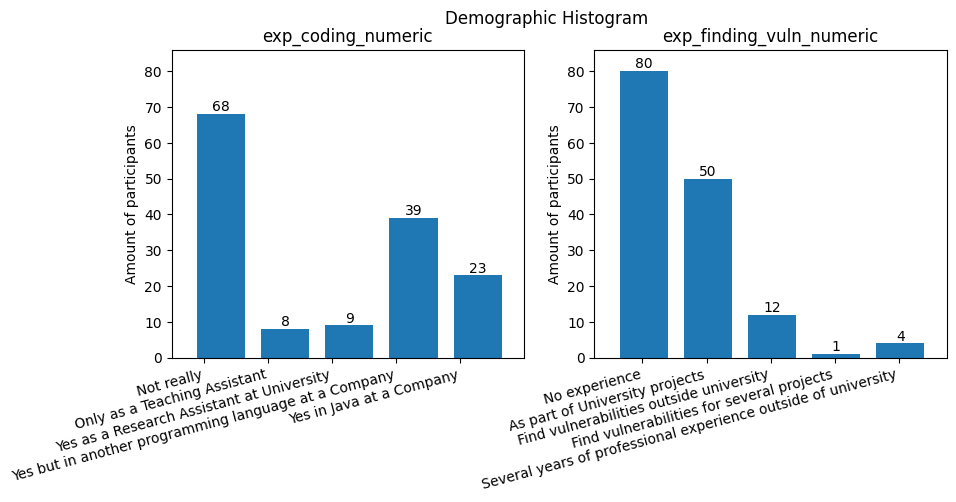

In [14]:
max_ylim = max(data.groupby(["exp_coding_numeric"])["respondent_id"].count().max(), data.groupby(["exp_finding_vuln_numeric"])["respondent_id"].count().max()) + 6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1 = produce_histogram(ax1, data, None, None, "exp_coding_numeric", MIN_DEMO1, MAX_DEMO1, GROUP_COLORS)
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.set_xticklabels(experience_coding_list, rotation=15, ha="right")
ax1.set_ylim([0,max_ylim])
ax1.set_ylabel("Amount of participants")

ax2 = produce_histogram(ax2, data, None, None, "exp_finding_vuln_numeric", MIN_DEMO2, MAX_DEMO2, GROUP_COLORS)
ax1.set_xticks([1, 2, 3, 4, 5])
ax2.set_xticklabels(experience_findingvuln_list, rotation=15, ha="right")
ax2.set_ylim([0,max_ylim])
ax2.set_ylabel("Amount of participants")

fig.suptitle("Demographic Histogram")
plt.show()

## Scatter plots
Represent values for two different numeric variables to compare the two variables.

In [15]:
def scatter_plot(ax, data, group, groupVal, colors, first, second):
  if group == None:
    data_scatter = data
    color = "blue"
  else:
    data_scatter = data[data[group] == groupVal]
    color = colors[groupVal]

  a, ca = np.unique(np.c_[data_scatter[first],data_scatter[second]], return_counts=True, axis=0)
  ax.scatter(a[:,0],a[:,1],s=ca*50, c=color)

  if "Demo" in first:
    min1 = MIN_DEMO1
    max1 = MAX_DEMO1
  else:
    min1 = MIN_INTERV1
    max1 = MAX_INTERV1

  if "Demo" in second:
    min2 = MIN_DEMO2
    max2 = MAX_DEMO2
  else:
    min2 = MIN_INTERV2
    max2 = MAX_INTERV2

  ax.set_xticks(np.arange(min1, max1+1,1),np.arange(min1, max1+1,1))
  ax.set_yticks(np.arange(min2, max2+1,1),np.arange(min2, max2+1,1))
  if group is not None:
    ax.set_title(group + " " + groupVal)
  return ax

### Demographic Scatter Plot

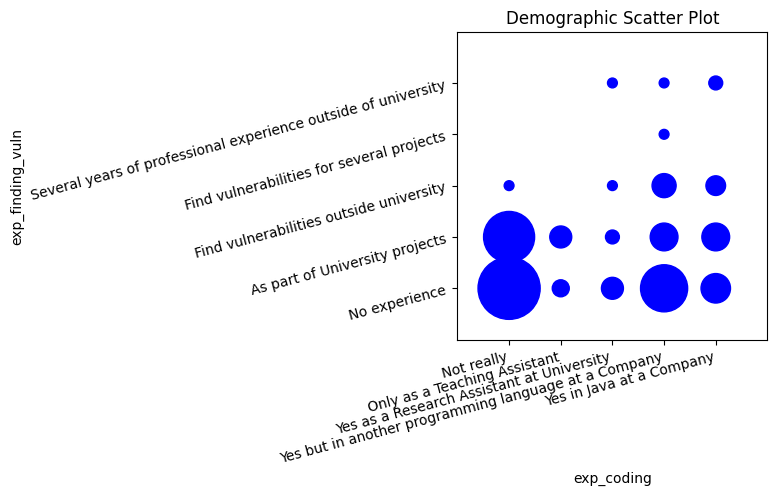

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = scatter_plot(ax, data, None, None, GROUP_COLORS,"exp_coding_numeric", "exp_finding_vuln_numeric")

ax.set_xlabel("exp_coding")
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_ylabel("exp_finding_vuln")
ax.set_xticklabels(experience_coding_list, rotation=15, ha="right")
ax.set_yticklabels(experience_findingvuln_list, rotation=15, ha="right")

plt.title("Demographic Scatter Plot")
plt.show()

# Intervention Metrics

In [17]:
# metric 1
slice_stats = {
    "mean": data["sum_correctness_slice"].mean(),
    "median": data["sum_correctness_slice"].median(),
    "std_dev": data["sum_correctness_slice"].std()
}
full_stats = {
    "mean": data["sum_correctness_full"].mean(),
    "median": data["sum_correctness_full"].median(),
    "std_dev": data["sum_correctness_full"].std()
}
print("Slice stats: ", slice_stats)
print("Full stats: ", full_stats)

Slice stats:  {'mean': 0.29058956916099776, 'median': 0.25, 'std_dev': 0.27754695528699097}
Full stats:  {'mean': 0.12862375719518576, 'median': 0.0, 'std_dev': 0.1884479279440781}


In [18]:
# metric 2
slice_stats_m2 = {
    "mean": data["sum_difficulty_slice"].mean(),
    "median": data["sum_difficulty_slice"].median(),
    "std_dev": data["sum_difficulty_slice"].std()
}
full_stats_m2 = {
    "mean": data["sum_difficulty_full"].mean(),
    "median": data["sum_difficulty_full"].median(),
    "std_dev": data["sum_difficulty_full"].std()
}
print("Slice stats: ", slice_stats_m2)
print("Full stats: ", full_stats_m2)

Slice stats:  {'mean': 6.659863945578231, 'median': 6.0, 'std_dev': 1.5282571263946743}
Full stats:  {'mean': 7.442176870748299, 'median': 7.0, 'std_dev': 1.6349322456770268}


## Boxplots
A standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

### Intervention Boxplot by Group

In [19]:
correctness_data = pd.melt(data[['sum_correctness_slice', 'sum_correctness_full']],
                           var_name='Metric', value_name='Value')

difficulty_data = pd.melt(data[['sum_difficulty_slice', 'sum_difficulty_full']],
                          var_name='Metric', value_name='Value')

confidence_data = pd.melt(data[['sum_confidence_slice', 'sum_confidence_full']],
                          var_name='Metric', value_name='Value')

correctness_per_scenario = pd.melt(data[['path_lines_correctness', 'userinjection_lines_correctness', 'xss_lines_correctness', 'dos_lines_correctness']],
                           var_name='Metric', value_name='Value')

difficulty_per_scenario = pd.melt(data[['path_difficulty', 'userinjection_difficulty', 'xss_difficulty', 'dos_difficulty']],
                           var_name='Metric', value_name='Value')

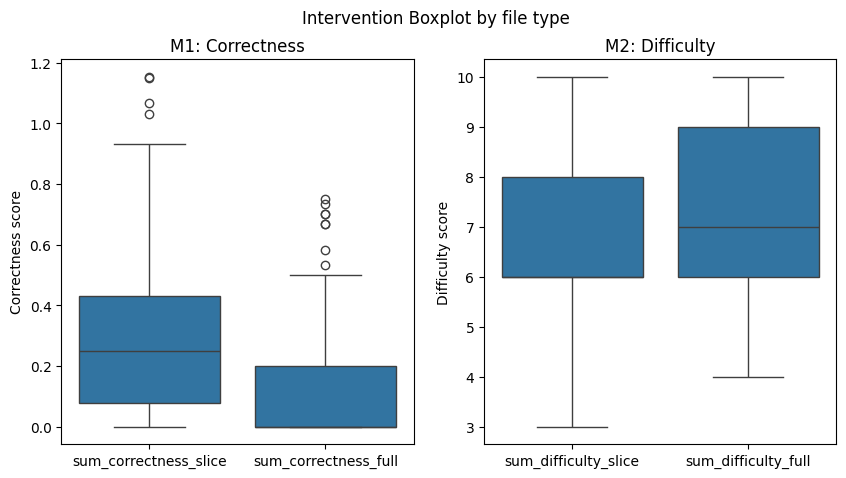

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='Metric', y='Value', data=correctness_data, ax=axes[0])
axes[0].set_title("M1: Correctness")
axes[0].set_xlabel("")
axes[0].set_ylabel("Correctness score")

# Plot Difficulty boxplot
sns.boxplot(x='Metric', y='Value', data=difficulty_data, ax=axes[1])
axes[1].set_title("M2: Difficulty")
axes[1].set_xlabel("")
axes[1].set_ylabel("Difficulty score")

fig.suptitle("Intervention Boxplot by file type")
plt.show()

### Intervention Boxplot by Scenario

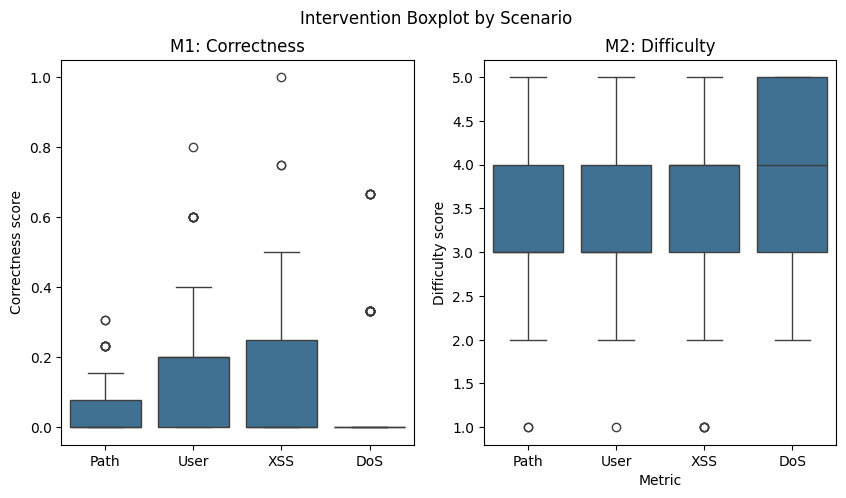

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Metric', y='Value', data=correctness_per_scenario, ax=axes[0])
axes[0].set_title("M1: Correctness")
axes[0].set_xlabel("")
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(["Path", "User", "XSS", "DoS"])
axes[0].set_ylabel("Correctness score")

sns.boxplot(x='Metric', y='Value', data=difficulty_per_scenario, ax=axes[1])
axes[1].set_title("M2: Difficulty")
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(["Path", "User", "XSS", "DoS"])
axes[1].set_ylabel("Difficulty score")

fig.suptitle("Intervention Boxplot by Scenario")
plt.show()

## Scatter plot

### Intervention Scatter Plot by Group

KeyError: 'Group'

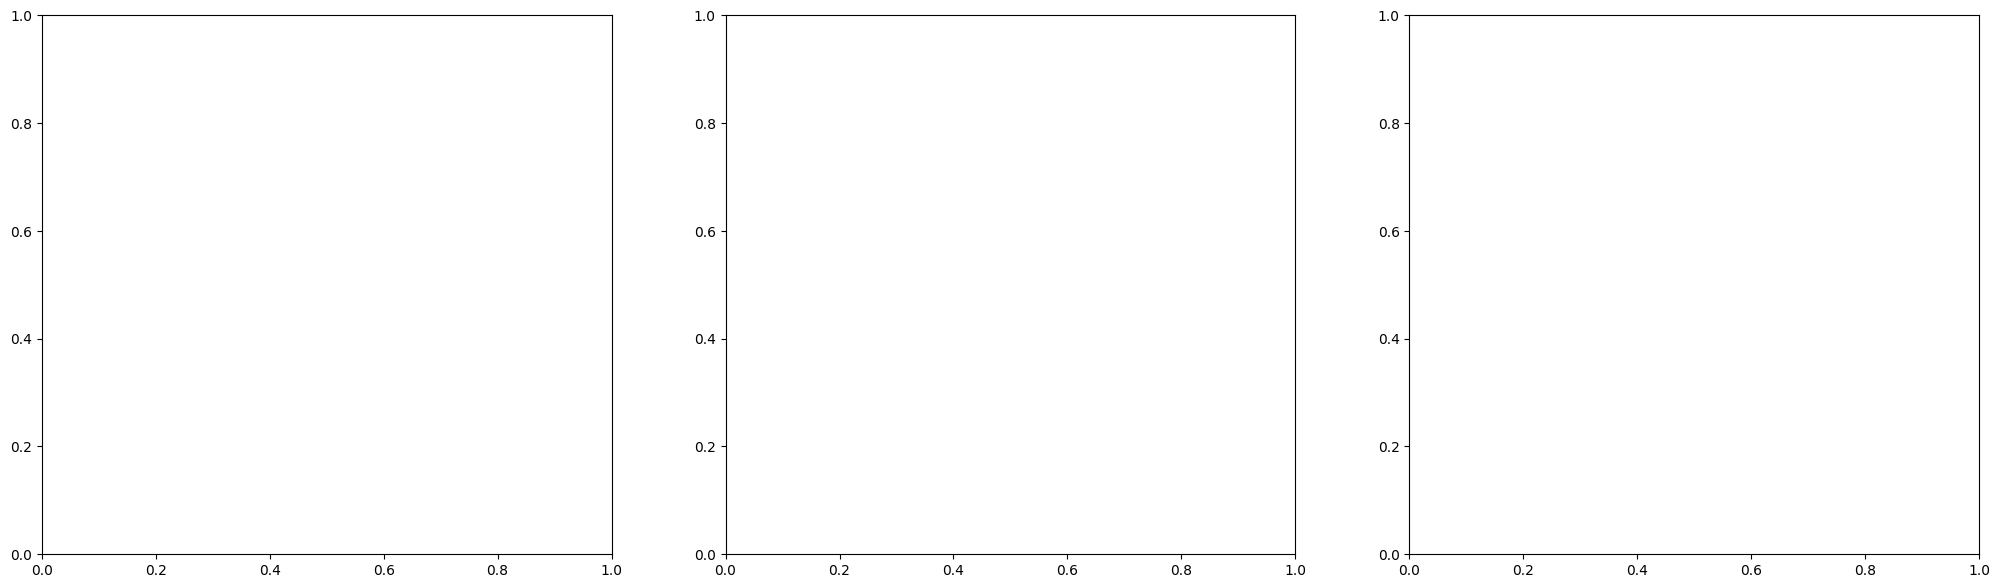

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

ax1 = scatter_plot(ax1, data, "Group", "A", GROUP_COLORS, "IntervM1", "IntervM2")
ax2 = scatter_plot(ax2, data, "Group", "B", GROUP_COLORS, "IntervM1", "IntervM2")
ax3 = scatter_plot(ax3, data, "Group", "C", GROUP_COLORS, "IntervM1", "IntervM2")

ax2.set_xlabel("Intervention Metric 1")
ax1.set_ylabel("Intervention Metric 2")

fig.suptitle("Intervention Scatter Plot by Group",fontsize=16)
plt.show()

# Perception Metric

## Histograms

### Perception Histogram

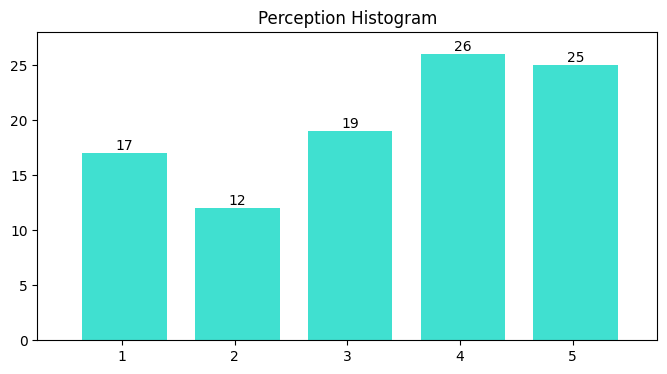

In [ ]:
max_ylim = data.groupby(["PercM"])["SID"].count().max()+2

fig, ax = plt.subplots(figsize=(8, 4))

ax = produce_histogram(ax, data, None, None, "PercM", MIN_PERC, MAX_PERC, GROUP_COLORS)
ax.set_ylim([0,max_ylim])

plt.title("Perception Histogram")
plt.show()

## Boxplots

### Perception Boxplot by Group


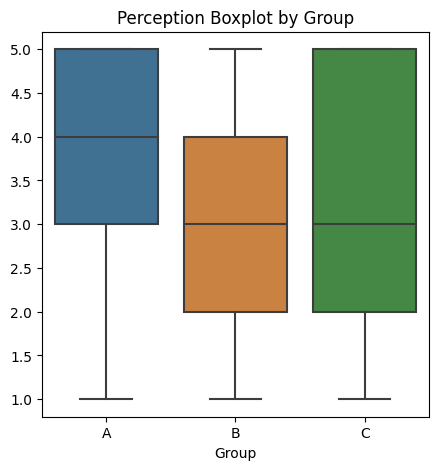

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='Group', y='PercM', data=data, ax=ax)
ax.set_title("Perception Boxplot by Group")
ax.set_ylabel("")

plt.show()

### Perception Boxplot by Scenario

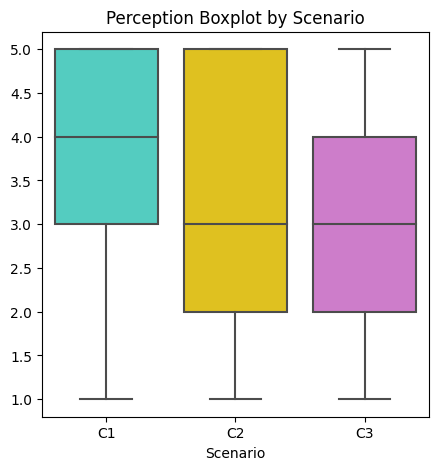

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='PercM', data=data, ax=ax)
ax.set_title("Perception Boxplot by Scenario")
ax.set_ylabel("")

plt.show()

# Statistical Test

# Analyze zero vs non-zero with Chi-square and Wilcoxon

In case your metrics determine an excess of zeros we need to split the analysis in two test:


1.   A test to determine an effect by a binary distinction: zero - non zero
2.   A test to determine an effect on the non-zero part of data. Ignoring in the analysis the zeros



In [29]:
# data_long = data.melt(id_vars=["respondent_id"],
#                       value_vars=["sum_correctness_slice", "sum_correctness_full"],
#                       var_name="Group",
#                       value_name="correctness")

# Convert to long format for both IntervM1 and IntervM2
data_long = data.melt(id_vars=["respondent_id"],
                      value_vars=["sum_correctness_slice", "sum_correctness_full", "sum_difficulty_slice", "sum_difficulty_full"],
                      var_name="Group",
                      value_name="Intervention")

# Extract M1/M2 and Group names
data_long[["InterventionType", "Group"]] = data_long["Group"].str.extract(r"sum_(\w+)_(\w+)")


In [37]:
print(data_long)

             respondent_id  Group  Intervention InterventionType
0    sum_correctness_slice  slice      0.200000      correctness
1        R_2xzP3qObkA69NAD  slice      0.000000      correctness
2        R_32Y1Hn1rVUXOZzP  slice      0.200000      correctness
3        R_2vdWuXgTSThhtKg  slice      0.326923      correctness
4        R_3ZNSmOFtlGu0hFO  slice      0.830769      correctness
..                     ...    ...           ...              ...
583      R_8UvXGyj7xfN3jmp   full      9.000000       difficulty
584      R_2OUcMW9QDVNt7jo   full      8.000000       difficulty
585      R_8q8DkOhOWMoMGYN   full     10.000000       difficulty
586      R_2kOvRCfl8uLkwcp   full     10.000000       difficulty
587      R_8PXmB8o9Ld76pye   full      5.000000       difficulty

[588 rows x 4 columns]


In [42]:
data_wide = data_long.pivot(index=["respondent_id", "Group"],
                            columns="InterventionType",
                            values="Intervention").reset_index()

# Rename columns for clarity
data_wide.columns.name = None  # Remove hierarchical column name
data_wide.rename(columns={"correctness": "InterventionCorrectness", "difficulty": "InterventionDifficulty"}, inplace=True)

print(data_wide)


             respondent_id  Group  InterventionCorrectness  \
0        R_10C0Fc0WmZPDXoz   full                 0.000000   
1        R_10C0Fc0WmZPDXoz  slice                 0.000000   
2        R_10xCrQJf9f4abHf   full                 0.000000   
3        R_10xCrQJf9f4abHf  slice                 0.076923   
4        R_122PenXDtfMkk6e   full                 0.000000   
..                     ...    ...                      ...   
289      R_xaVdsmgzk12EEeZ  slice                 0.276923   
290      R_yWRsR2tIRhTBTSF   full                 0.000000   
291      R_yWRsR2tIRhTBTSF  slice                 0.000000   
292  sum_correctness_slice   full                 0.000000   
293  sum_correctness_slice  slice                 0.200000   

     InterventionDifficulty  
0                       8.0  
1                       4.0  
2                      10.0  
3                       7.0  
4                       8.0  
..                      ...  
289                     6.0  
290            

In [51]:
# #define threshold for zero/non-zero or keep zero as the threshold
threshold_intervm1 = 0 #here your choice, it can also be zero
threshold_intervm2 = 0 #here your choice, it can also be zero

#all below threshold and equal is zero, else is non-zero
data_zero_non_zero = data_wide.copy()
data_zero_non_zero.loc[data_zero_non_zero['InterventionCorrectness']<=threshold_intervm1,'InterventionCorrectness']=0
data_zero_non_zero.loc[data_zero_non_zero['InterventionCorrectness']>threshold_intervm1,'InterventionCorrectness']=1

data_zero_non_zero.loc[data_zero_non_zero['InterventionDifficulty']<=threshold_intervm2,'InterventionDifficulty']=0
data_zero_non_zero.loc[data_zero_non_zero['InterventionDifficulty']>threshold_intervm2,'InterventionDifficulty']=1

#chi-square test zero-non zero
contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.InterventionCorrectness)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.InterventionDifficulty)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

InterventionCorrectness  0.0  1.0
Group                            
full                      82   65
slice                     36  111
Group x IntervM1 Chi_square value 28.666698767334363 p value 8.596945080874502e-08 degrees of freedom 1
InterventionDifficulty  1.0
Group                      
full                    147
slice                   147
Group x IntervM2 Chi_square value 0.0 p value 1.0 degrees of freedom 0


Inspect only non-zero values using Wilcoxon

In [48]:
#ignore zero values

data_nonzero_intervm1 = data_wide[data_wide['InterventionCorrectness']>threshold_intervm1]
data_nonzero_intervm2 = data_wide[data_wide['InterventionDifficulty']>threshold_intervm2]

from itertools import combinations

#groups do not change
group_pairs = list(combinations(data_wide["Group"].unique(), 2))

my_groups = data_nonzero_intervm1["Group"].unique()

#A vs B
stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['InterventionCorrectness'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[1]]['InterventionCorrectness'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[1],stat, p))
#A vs C
# stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['InterventionCorrectness'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[2]]['InterventionCorrectness'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[2],stat, p))

#same for intervM2
my_groups = data_nonzero_intervm2["Group"].unique()

stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['InterventionDifficulty'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[1]]['InterventionDifficulty'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[1],stat, p))

# stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['InterventionDifficulty'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[2]]['InterventionDifficulty'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[2],stat, p))

IntervM1 Group slice x Group full stat = 2.433920141003154, p-value = 0.014936290036415164
IntervM2 Group full x Group slice stat = 3.8684267629677755, p-value = 0.00010953982615859261


## If data is ordinal, perform Wilcoxon Ranksum Tests

In case we do not have an excess of zeros we can directly apply Wilcoxon if ordinal

In [49]:
from itertools import combinations

my_groups = data_wide["Group"].unique()

#A vs B
stat, p = stats.ranksums(x=data_wide[data_wide.Group == my_groups[0]]['InterventionCorrectness'], y=data_wide[data_wide.Group == my_groups[1]]['InterventionCorrectness'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('InterventionCorrectness', my_groups[0], my_groups[1],stat, p))
#A vs C


#same for intervM2
stat, p = stats.ranksums(x=data_wide[data_wide.Group == my_groups[0]]['InterventionDifficulty'], y=data_wide[data_wide.Group == my_groups[1]]['InterventionDifficulty'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('InterventionDifficulty', my_groups[0], my_groups[1],stat, p))


InterventionCorrectness Group full x Group slice stat = -5.728207744419388, p-value = 1.01497225834002e-08
InterventionDifficulty Group full x Group slice stat = 3.8684267629677755, p-value = 0.00010953982615859261


In [ ]:
from itertools import combinations

scenario_pairs = list(combinations(data["Scenario"].unique(), 2))

for pair in scenario_pairs:
  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['IntervM1'], y=data[data.Scenario == pair[1]]['IntervM1'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM1', pair[0], pair[1],stat, p))

  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['IntervM2'], y=data[data.Scenario == pair[1]]['IntervM2'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM2', pair[0], pair[1],stat, p))

IntervM1 Scenario C1 x Scenario C2 stat = 1.3914545331028711, p-value = 0.16408763786000768
IntervM2 Scenario C1 x Scenario C2 stat = -0.455268533872368, p-value = 0.6489160608241231
IntervM1 Scenario C1 x Scenario C3 stat = 1.5004624919173817, p-value = 0.13349464240555095
IntervM2 Scenario C1 x Scenario C3 stat = -0.5706887255583204, p-value = 0.5682106626445554
IntervM1 Scenario C2 x Scenario C3 stat = -0.14748135604316145, p-value = 0.8827520945320161
IntervM2 Scenario C2 x Scenario C3 stat = -0.21160368475757949, p-value = 0.8324162344076115


## If data is binary, perform Chi-Square Test.

In case we do not have an excess of zeros we can directly apply Chi-Square if binary

In [ ]:
contingency_table = pd.crosstab(data.Group, data.IntervM1)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Group, data.IntervM2)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Scenario, data.IntervM1)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.Scenario, data.IntervM2)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Scenario x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

Group x IntervM1 Chi_square value 60.216666666666676 p value 0.020923909068502587 degrees of freedom 40
Group x IntervM2 Chi_square value 36.449999999999996 p value 0.6308498044355616 degrees of freedom 40
Scenario x IntervM1 Chi_square value 35.24285714285715 p value 0.6840872325897815 degrees of freedom 40
Scenario x IntervM2 Chi_square value 28.86666666666667 p value 0.9044083714369704 degrees of freedom 40


# [OPTIONAL] Additional analysis
This is free for students to add additional analysis and plots